## Generalized Additive Model for nitrite determination

In [6]:
dat = read.csv('sensor_n.csv', sep='\t')

In [7]:
head(dat)

Ammonium,Nitrate,Nitrite
1.55,26.35,0.00
4.61,3.32,6.61
15.44,0.53,8.43
25.78,0.22,7.12
17.36,5.52,9.65
15.22,5.52,6.40


In [4]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-26. For overview type 'help("mgcv-package")'.


In [75]:
#dat$N = dat$Ammonium + dat$Nitrate
model <- gam(Nitrite ~ s(Ammonium, bs='ps', sp=0.1)+s(Nitrate, bs='ps', sp=0.1), data = dat)

In [76]:
summary(model)


Family: gaussian 
Link function: identity 

Formula:
Nitrite ~ s(Ammonium, bs = "ps", sp = 0.1) + s(Nitrate, bs = "ps", 
    sp = 0.1)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.175      0.438   20.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df      F  p-value    
s(Ammonium) 7.798  8.368  6.146 9.23e-07 ***
s(Nitrate)  7.661  8.118 19.147  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.585   Deviance explained = 63.9%
GCV = 26.676  Scale est. = 23.017    n = 120

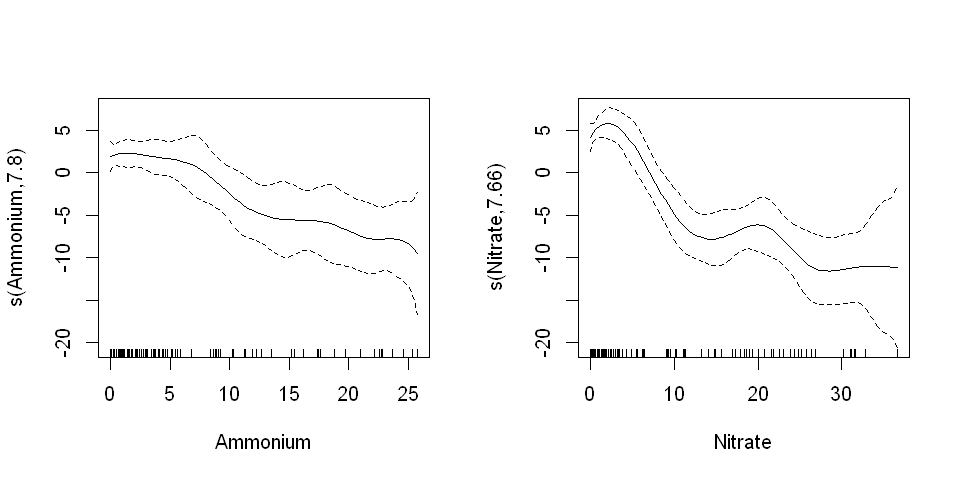

In [77]:
par(mfrow=c(1,2))
plot(model)


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 11 iterations.
The RMS GCV score gradient at convergence was 2.415358e-06 .
The Hessian was positive definite.
Model rank =  19 / 19 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

              k'  edf k-index p-value
s(Ammonium) 9.00 1.00    1.01    0.50
s(Nitrate)  9.00 5.38    1.09    0.81


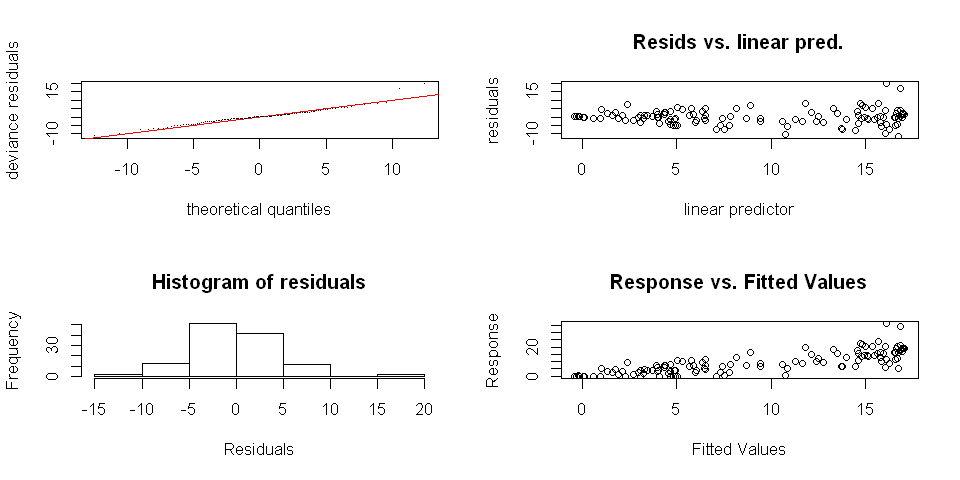

In [67]:
par(mfrow = c(2,2))
gam.check(model)

In [68]:
test_data = read.csv('nitrite_test.csv', sep='\t')
x_new = test_data[,c('Ammonium','Nitrate')]
y_new = test_data[,'Nitrite']

In [78]:
no2_pred <- predict(model, newdata=x_new)

In [83]:
help(par)

par {graphics},R Documentation
...,"arguments in tag = value form, or a list of tagged values. The tags must come from the names of graphical parameters described in the ‘Graphical Parameters’ section."
no.readonly,"logical; if TRUE and there are no other arguments, only parameters are returned which can be set by a subsequent par() call on the same device."


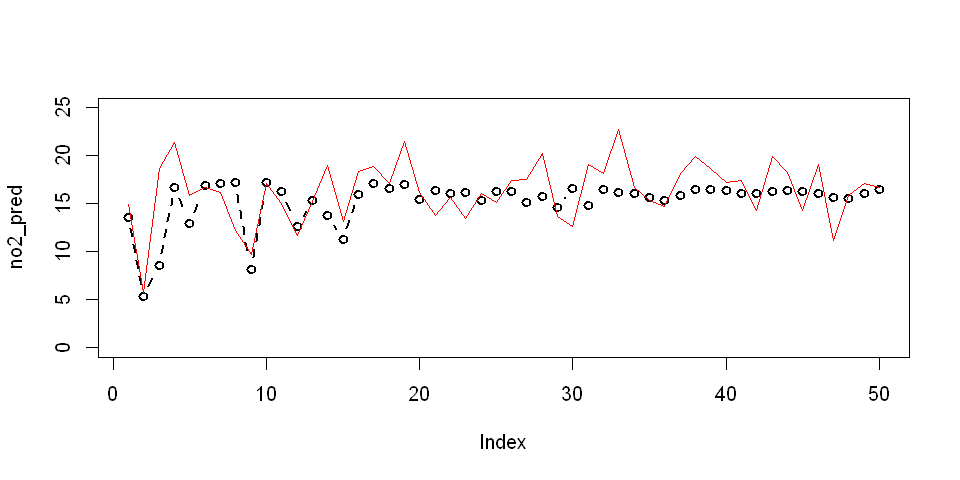

In [86]:
options(repr.plot.width = 8, repr.plot.height = 4)

plot(no2_pred, ylim=c(0,25), type='b', lty='dashed', lwd=2)
points(y_new, type='l', col='red')

In [101]:
getwd()

[1] "G:/My Drive/UM PhD Docs/ZAB Research/Lab DATA"

In [102]:
write.table(no2_pred, file="G:/My Drive/UM PhD Docs/ZAB Research/Lab DATA/no2_gam.csv", sep=",")

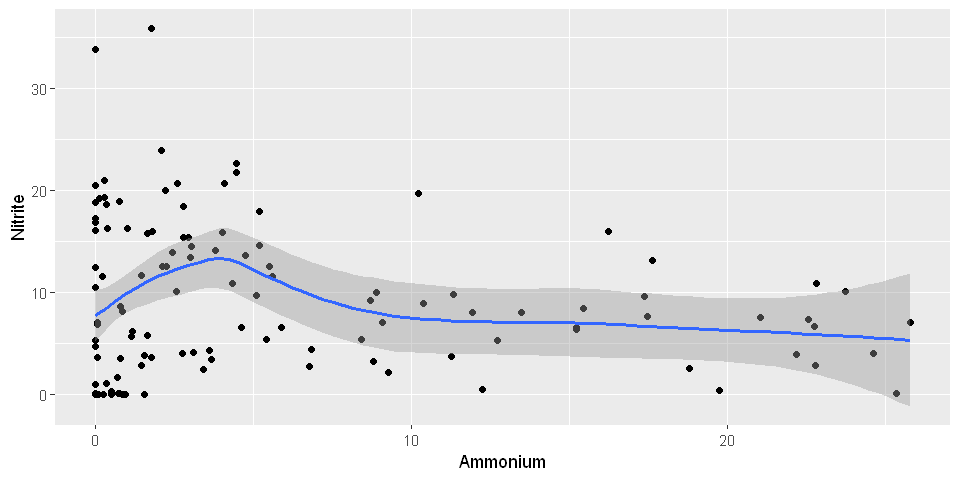

In [96]:
library(ggplot2)
ggplot(dat, aes(Ammonium, Nitrite)) + geom_point() +
    geom_smooth(method = loess, span=0.2)